In [13]:
import numpy as np
import math
import plotly.graph_objects as go
class Gradient_descent():
    def __init__(self):

        self.beta = 0.6
        self.p_0 = 1
        self.function = None
        self.x0 = None

    def derivative(self, function, x, dx=1e-6):
        return (self.function(x+dx) - self.function(x)) / dx

    def gradient(self, function, x, dx=1e-6):
        dim = x.shape[0]
        grad = np.zeros(x.shape)
        for i in range(dim):
            right = x.copy().astype(float)
            right[i, :] = right[i, :] + dx
            grad[i, :] = (function(right) - function(x)) / dx

        return grad

    def gradient_descent(self, function, start_point, p_o, beta, iteration):
        self.function = function
        self.x0 = start_point
        self.min_legend = []
        # VALIDATE USER`S INPUTS
        if p_o <= 0:
            raise Exception("p_0 should be greater than 0")
        if not ((beta < 1) and (0.5 <= beta)):
            raise Exception("beta should be in range(0.5,1)")
            # add validate on start_point(optional)

        # ALGORITM
        # 1
        p_k = p_o
        x_k = start_point
        self.min_legend.append(x_k)
        for k in range(iteration):
            # 2
            grad_f = self.gradient(function, x_k)
            norm = np.linalg.norm(grad_f)
            if grad_f.any() == 0:
                return x_k
                break
            h_k = grad_f/norm  # 3

            p_k1 = p_k  # 4

            flag = True
            while flag:
                x_k1 = x_k-p_k*h_k  # 5
                self.min_legend.append(x_k)
                if self.function(x_k1) < self.function(x_k):
                    k = k+1
                    flag = False
                else:
                    p_k = beta*p_k  # goto 5

            x_k = x_k1
            self.min_legend.append(x_k)
        self.extr = x_k
        return x_k, self.function(x_k)


    def show_me_visualisation(self, parametr):

        bound = 4  # need to be specified partiqulary
        X = np.linspace(-bound, bound, 100)
        Y = np.linspace(-bound, bound, 100)
        Z = np.zeros((X.shape[0], Y.shape[0]))

        x_ = []
        y_ = []
        z_ = []
        for i in self.min_legend:
            x_.append(float(i[0]))
            y_.append(float(i[1]))
            z_.append(float(self.function(i)))

        X, Y = np.meshgrid(X, Y)
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                Z[i, j] = self.function(np.asarray((X[i, j], Y[i, j])))

        if parametr == "3D":
            trace = go.Surface(x=X, y=Y, z=Z)
            data = [trace]
            layout = go.Layout(title='3D Surface plot')
            fig = go.Figure(data=data)
            fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                              highlightcolor="limegreen", project_z=True))

            fig.add_scatter3d(x=x_, y=y_, z=z_, marker=dict(
                size=5, color="Pink"), opacity=True)
            fig.update_layout(width=1000, height=1000)

                              
        if parametr == "countour":
            trace=go.Contour(z=Z)
            data=[trace]
            fig=go.Figure(data=data)

            fig.add_scatter(x=x_, y=y_) #NEED TO FIX
            fig.update_layout(title_text="{}heatmap".format(parametr))
            
        fig.show()



def himmelblau(X):

    output=(-20.0 * math.exp(-0.2 * math.sqrt(0.5 * (X[0]**2 + X[1]**2))) - math.exp(0.5 * (math.cos(2 * math.pi * X[0]) + math.cos(2 * math.pi * X[1]))) + math.e + 20)

    return output
# initialise start point
start = np.array([[-0.27], [-0.92]])

In [14]:
gd = Gradient_descent()
min_point, function_value = gd.gradient_descent(himmelblau,start_point=start,p_o=1,beta=1/2,iteration=11)
print(f"Min point is: \t {min_point.T} \
        Value of function is {function_value}")

Min point is: 	 [[ 2.35930519e-06 -9.52167045e-01]]         Value of function is 2.579927557189041


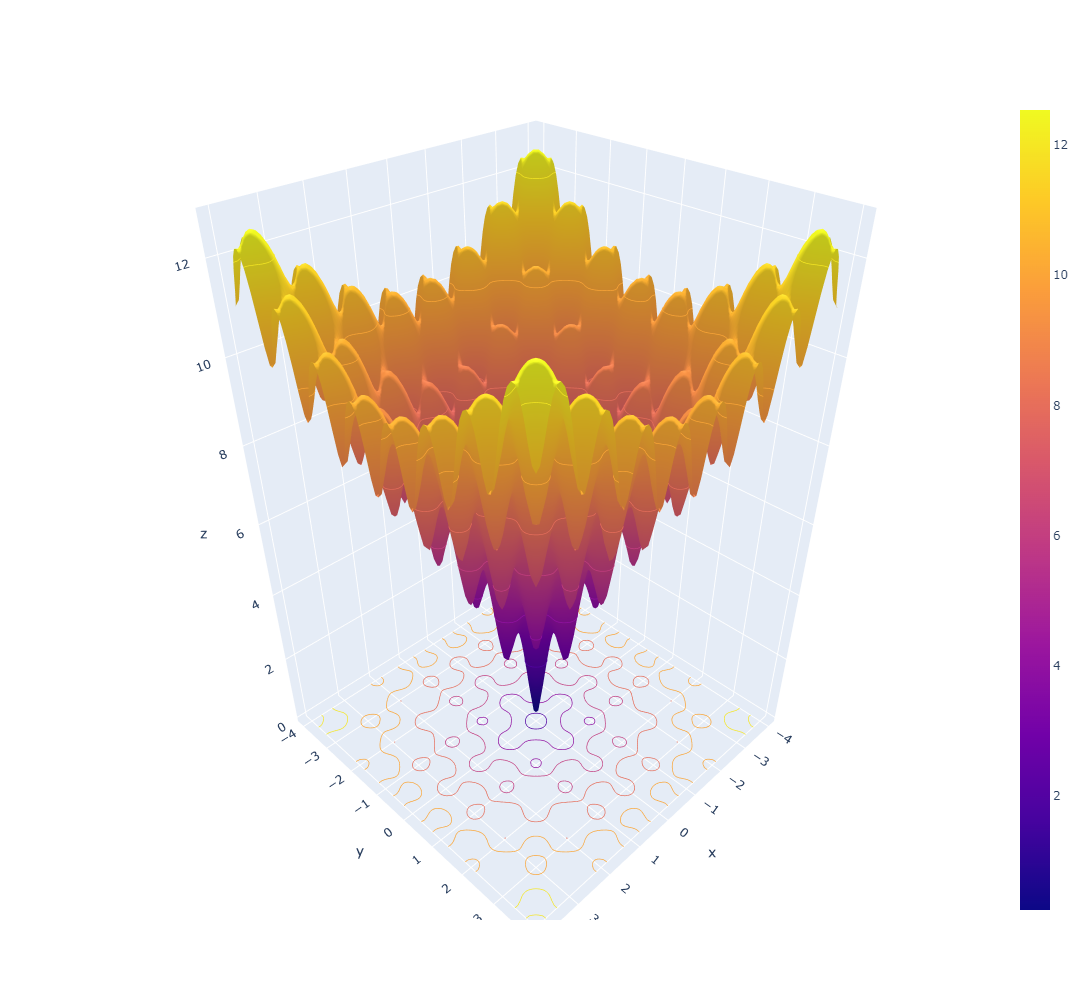

In [15]:
gd.show_me_visualisation("3D")